# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [99]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

dataset  = fetch_california_housing(as_frame = True)


In [100]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


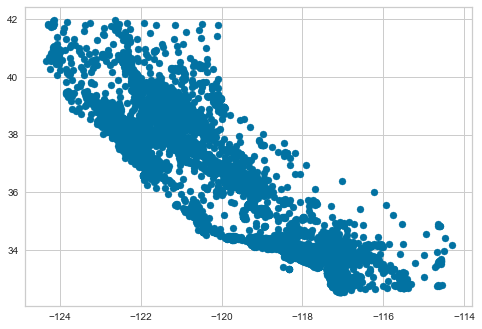

In [101]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [102]:
X_ = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [103]:
X_.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [146]:
X.shape

(20640, 10)

## KMeans Training

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#fitting with cluster value  3 and printing

labels = kmeans.labels_
print(labels)

[2 0 2 ... 2 2 2]


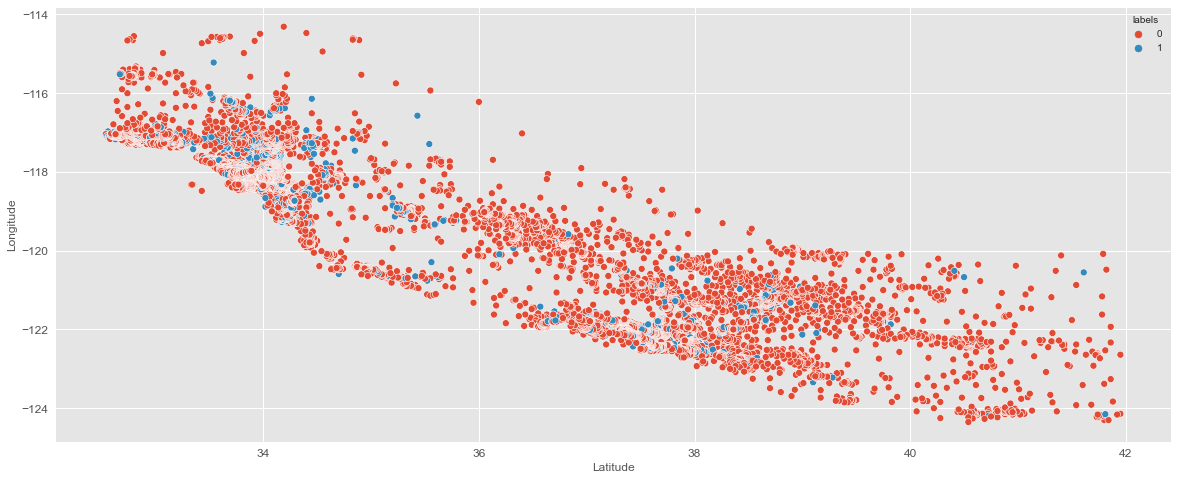

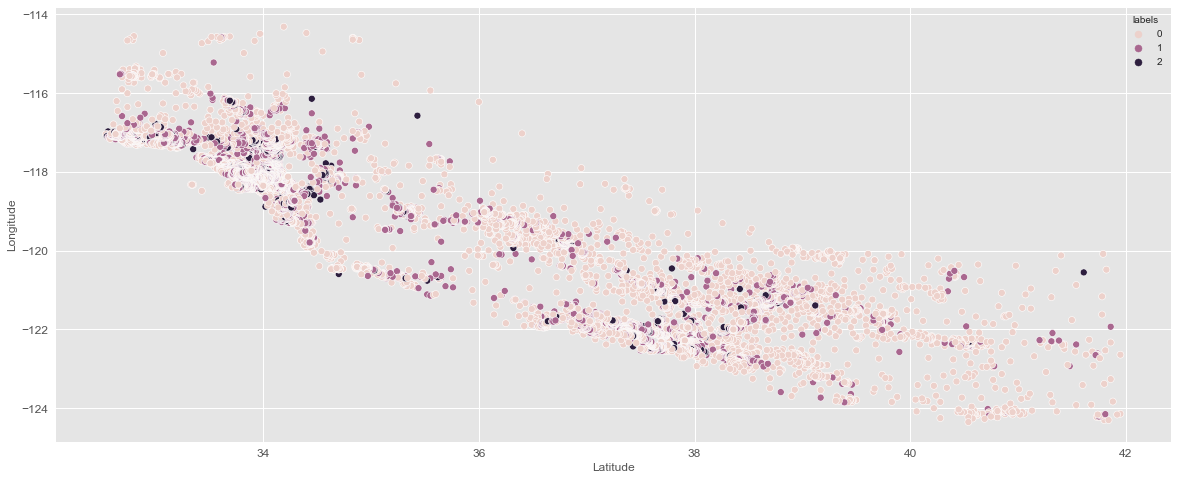

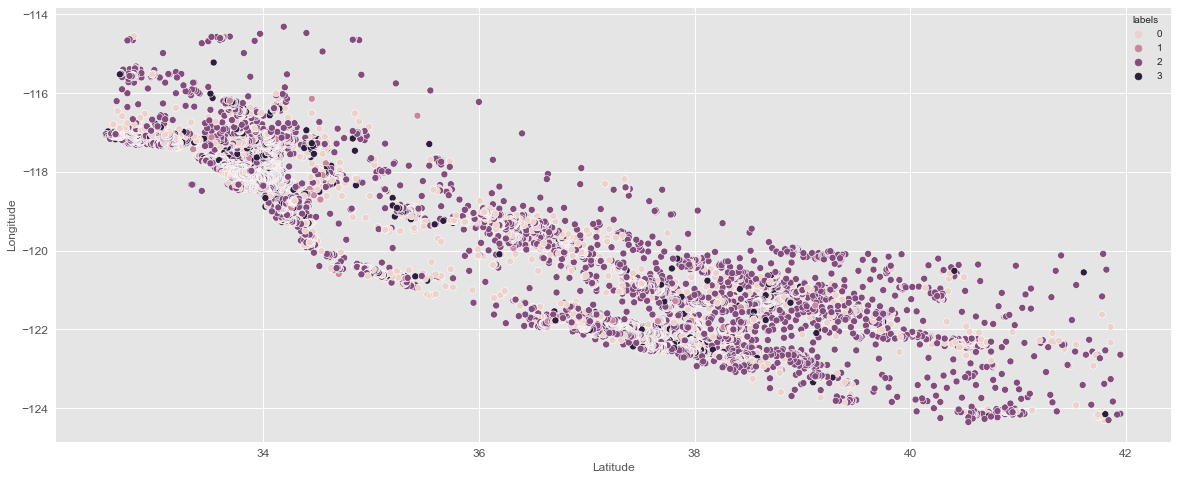

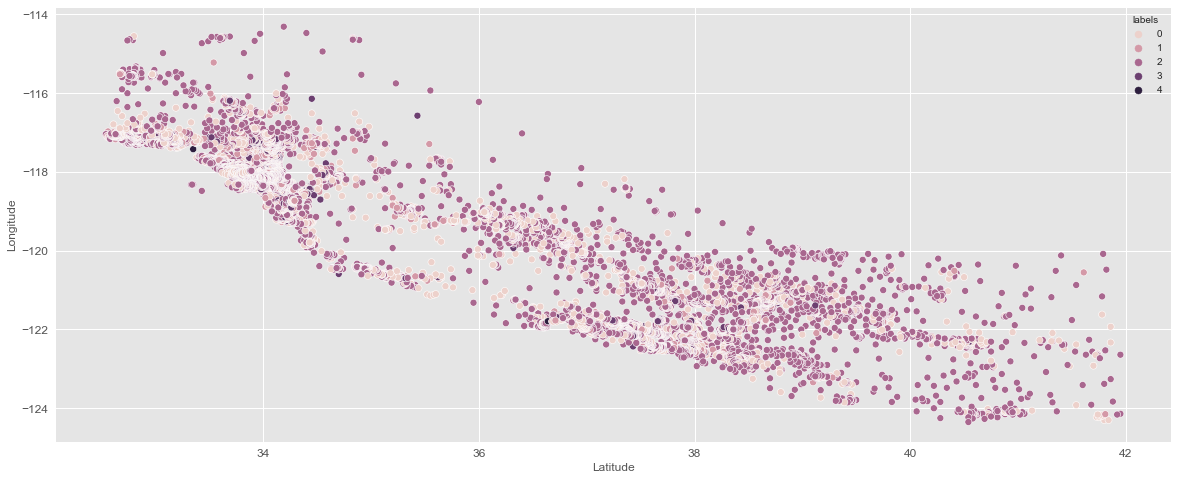

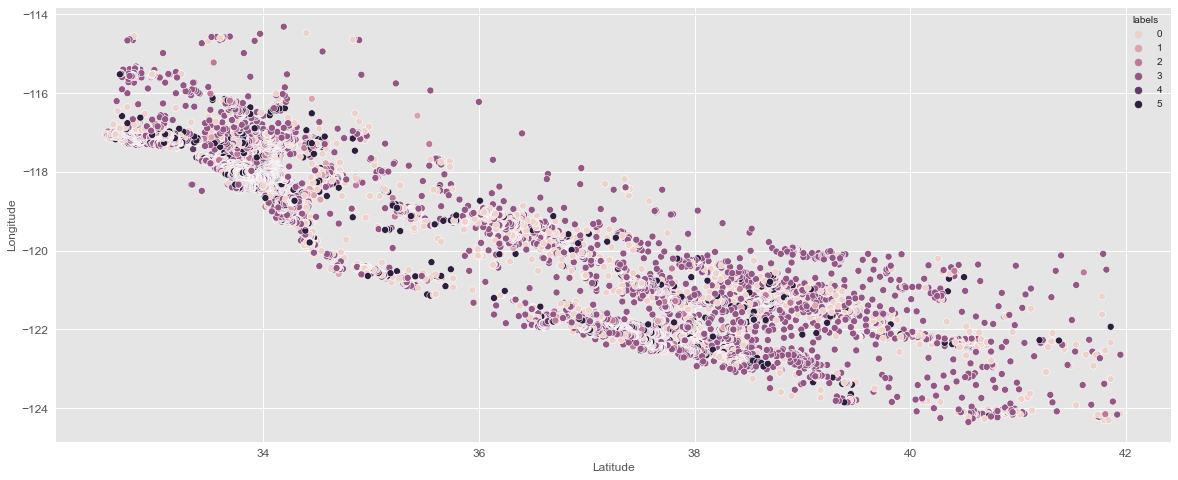

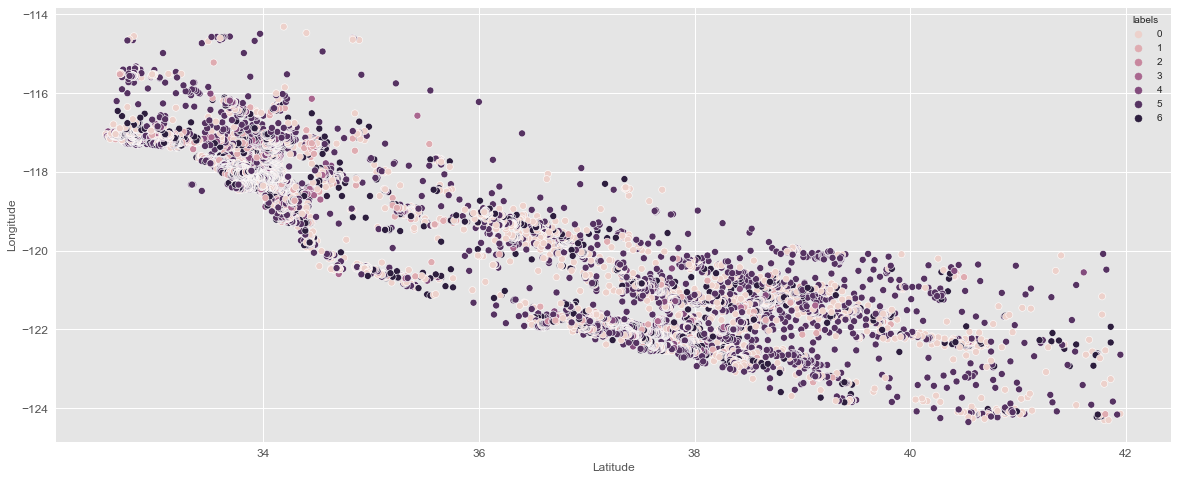

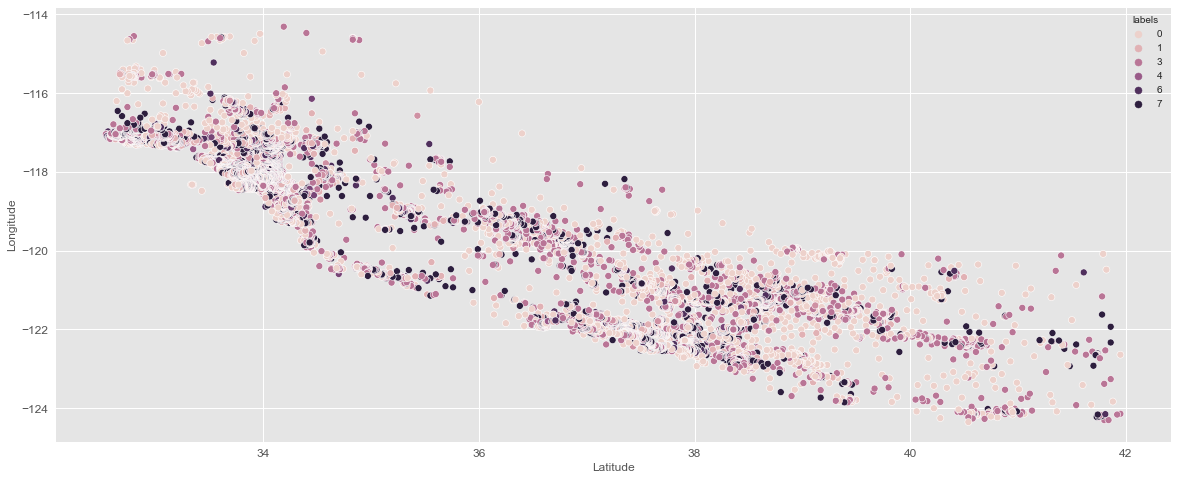

In [159]:
# visualizing the data for different n cluster number
for k in range(2,9):
    kmeans = KMeans(n_clusters = k)
    clusters = kmeans.fit_predict(X)
    X["labels"] = clusters
    plt.figure(figsize=(20,8))
    sns.scatterplot(data=X, x="Latitude", y="Longitude", hue="labels")
plt.show()

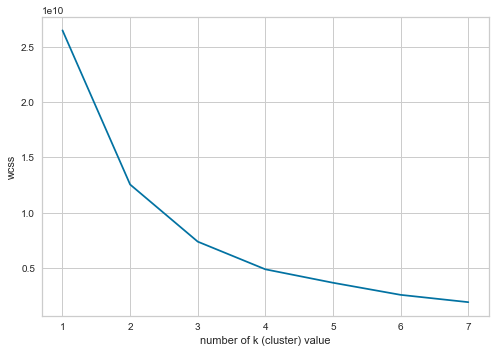

In [107]:
# Applying the The Elbow Method

#creating a list
wcss = []
#calculating the wcss for every cluster value
for k in range(1,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

## Silhouette Score:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

In [108]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns

In [133]:
# Silhouette Score for different cluster values

for i in range(2,9):
    KMean= KMeans(n_clusters=i)
    KMean.fit(X)
    label=KMean.predict(X)
    score = silhouette_score(X, KMean.labels_, metric='euclidean')
    print("Silhouetter Score with {} cluster: {:.3f}".format(i,score) )

Silhouetter Score with 2 cluster: 0.707
Silhouetter Score with 3 cluster: 0.606
Silhouetter Score with 4 cluster: 0.561
Silhouetter Score with 5 cluster: 0.552
Silhouetter Score with 6 cluster: 0.534
Silhouetter Score with 7 cluster: 0.525
Silhouetter Score with 8 cluster: 0.524


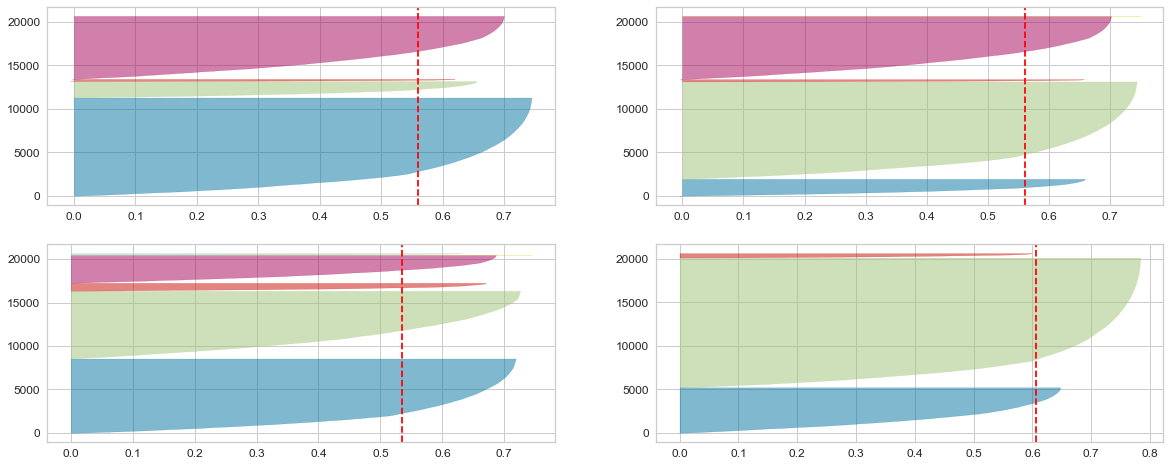

In [125]:
#printing silhouette graph 

fig, ax = plt.subplots(2, 2, figsize=(20,8))
for i in [ 3, 4, 5, 6]:
    KMean = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(KMean, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(X)